In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/exp_2.csv", index_col=["Unnamed: 0"])

In [3]:
df.head()

,Server-RSSI-1,Server-RSSI-2,Server-Distance-1,Server-Distance-2
0,-38,-74,0.4,3.6
1,-51,-67,0.4,3.6
2,-48,-68,0.4,3.6
3,-48,-79,0.4,3.6
4,-53,-71,0.4,3.6


In [4]:
df.describe()

,Server-RSSI-1,Server-RSSI-2,Server-Distance-1,Server-Distance-2
count,1600.000000,1600.000000,1600.000000,1600.000000
mean,-46.389375,-63.848125,1.800000,2.200000
std,7.212768,7.827890,0.916802,0.916802
min,-65.000000,-90.000000,0.400000,0.800000
25%,-52.000000,-68.000000,1.100000,1.500000
50%,-47.000000,-64.000000,1.800000,2.200000
75%,-39.000000,-59.000000,2.500000,2.900000
max,-34.000000,-47.000000,3.200000,3.600000


Basically, in this experiment we had 2 transmitter antennas in opposite part of room and one receiver, which was reading RSSI values. We were moving receiver by 40 cm and at each position taking 200 samples of RSSI. RSSI was taken each 250 ms. Importantly, that Transmitter 1 was directed to receiver and transmitter 2 was perpendicular to that direction.

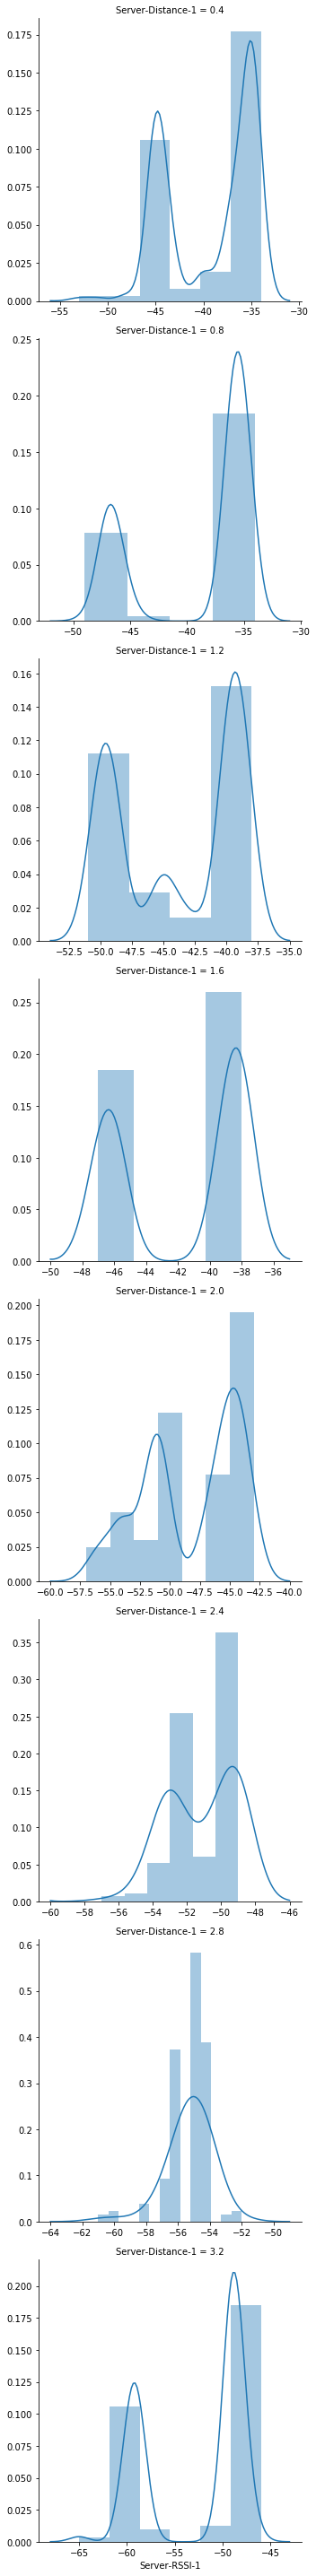

In [5]:
g = sns.FacetGrid(df, row="Server-Distance-1", sharex=False, sharey=False, height=5)
g.map(sns.distplot, "Server-RSSI-1", kde_kws={'bw': 1})

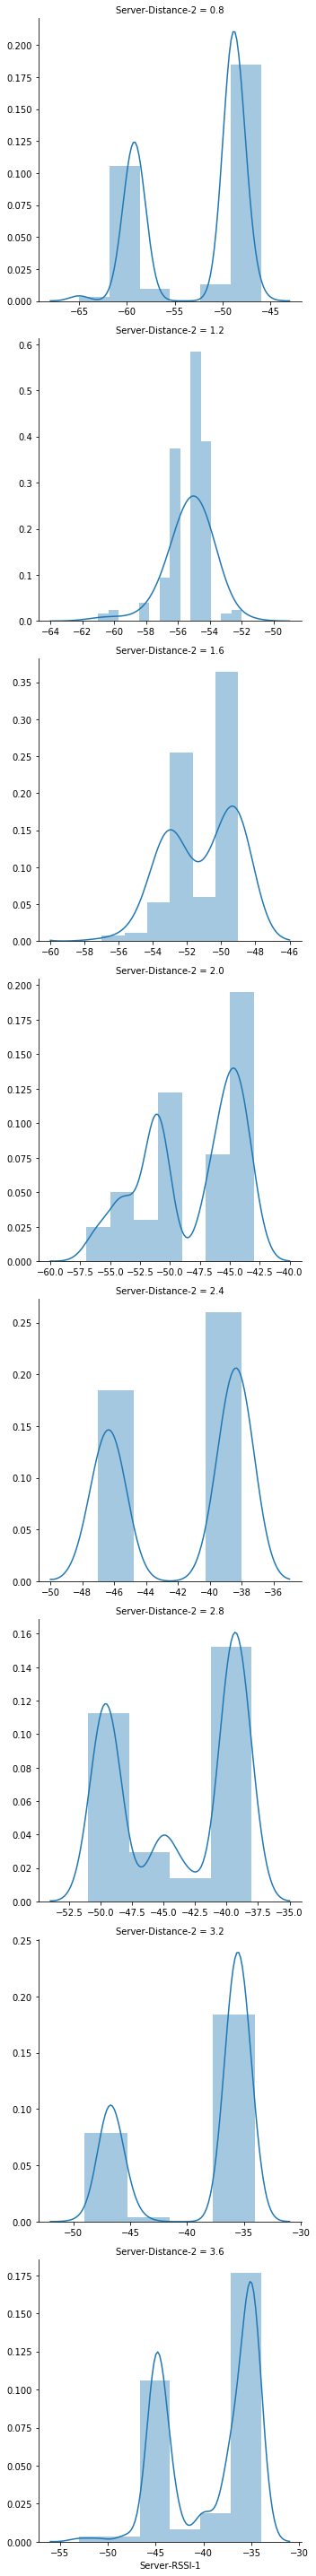

In [6]:
g = sns.FacetGrid(df, row="Server-Distance-2", sharex=False, sharey=False, height=5)
g.map(sns.distplot, "Server-RSSI-1", kde_kws={'bw': 1})

We can see, that pdf is bimodal, and it can be explained by the fact, that microcontroller uses different channels for advertisement

In [7]:
np.corrcoef(df["Server-RSSI-1"], df["Server-Distance-1"])

array([[ 1.        , -0.77280624],
       [-0.77280624,  1.        ]])

In [8]:
np.corrcoef(df["Server-RSSI-2"], df["Server-Distance-2"])

array([[ 1.        , -0.56097297],
       [-0.56097297,  1.        ]])

We can see, that correlation is high and also, that increase of distance imply decrease of signal stregnth

Also, we see, how antenna's direction impact on correlation

We know, that for radio signal propagation is determined by inverse-square law, so


$intensity \propto \frac{1}{distance^2}$

# With only 1 channel

In [41]:
df = pd.read_csv("./data/1_channel.csv", index_col=["Unnamed: 0"])

In [42]:
df.head()

,Server-RSSI,Server-Distance
0,-51.0,0.4
1,-35.0,0.4
2,-35.0,0.4
3,-34.0,0.4
4,-34.0,0.4


In [43]:
df.describe()

,Server-RSSI,Server-Distance
count,1400.000000,1400.000000
mean,-48.368571,1.600000
std,6.763429,0.800286
min,-60.000000,0.400000
25%,-53.000000,0.800000
50%,-49.000000,1.600000
75%,-45.750000,2.400000
max,-34.000000,2.800000


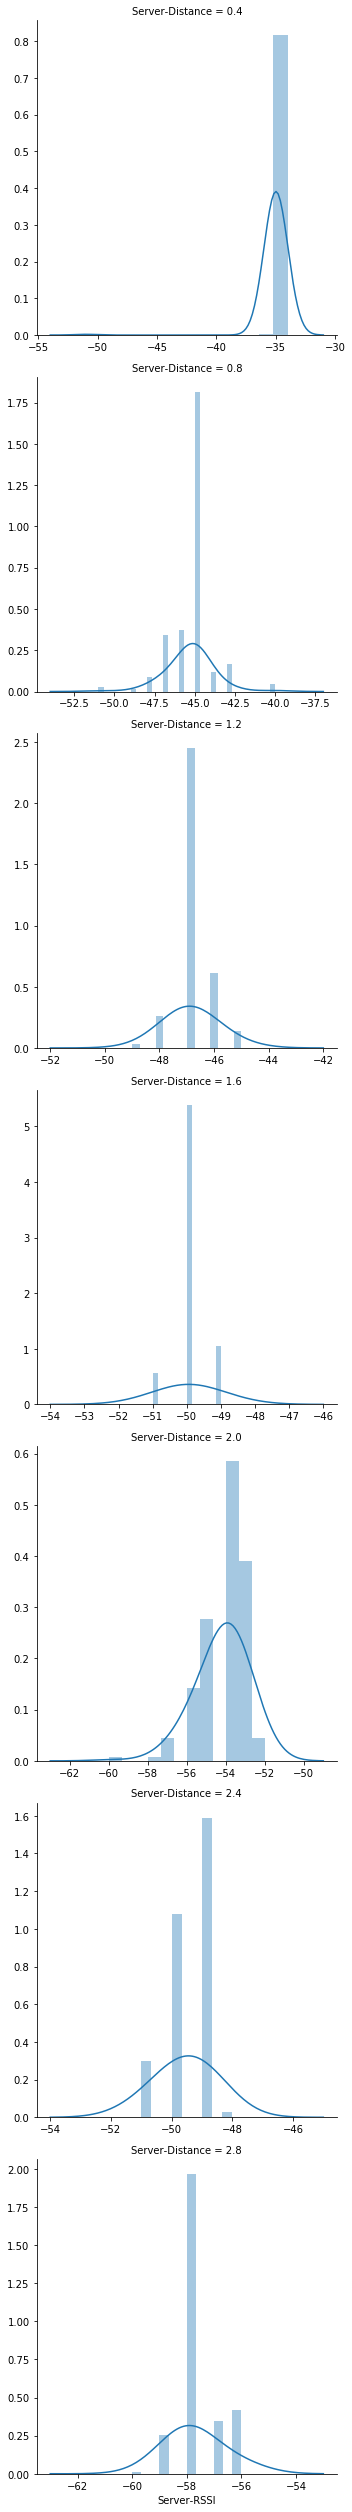

In [48]:
g = sns.FacetGrid(df, row="Server-Distance", sharex=False, sharey=False, height=5)
g.map(sns.distplot, "Server-RSSI", kde_kws={'bw': 1})